In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
sns.set(style='whitegrid',color_codes=True)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Data is collected from 2011 january to 2012 dec

In [4]:
train_df = pd.read_csv("train.csv")
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Extracting the hour,day,month and year from the datetime column
train_df["hour"] = [t.hour for t in pd.DatetimeIndex(train_df.datetime)]
train_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_df.datetime)]
train_df["month"] = [t.month for t in pd.DatetimeIndex(train_df.datetime)]
train_df["year"] = [t.year for t in pd.DatetimeIndex(train_df.datetime)]
train_df["year"] = train_df["year"].map({2011: 0, 2012: 1})
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [6]:
train_df["month"] = train_df["month"].map(
    {
        1: "January",
        2: "Febraury",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December",
    }
)
train_df["year"] = train_df["year"].map({0: "2011", 1: "2012"})
train_df["day"] = train_df["day"].map(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    }
)

train_df["season"] = train_df["season"].map({1 : "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter" })
train_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Saturday,January,2011
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday,January,2011
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Saturday,January,2011
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Saturday,January,2011
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Saturday,January,2011


In [7]:
train_df.year.value_counts().reset_index()

,index,year
0,2012,5464
1,2011,5422


In [8]:
train_df.loc[(train_df["year"] == "2011")]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,Saturday,January,2011
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,Saturday,January,2011
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,Saturday,January,2011
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,Saturday,January,2011
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,Saturday,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,2011-12-19 19:00:00,Winter,0,1,2,14.76,17.425,53,11.0014,17,234,251,19,Monday,December,2011
5418,2011-12-19 20:00:00,Winter,0,1,1,16.40,20.455,40,11.0014,9,197,206,20,Monday,December,2011
5419,2011-12-19 21:00:00,Winter,0,1,2,14.76,17.425,53,8.9981,15,112,127,21,Monday,December,2011
5420,2011-12-19 22:00:00,Winter,0,1,2,14.76,17.425,57,11.0014,12,95,107,22,Monday,December,2011


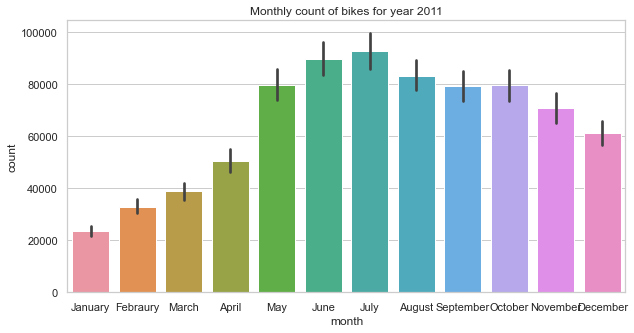

In [9]:
# Plotting Monthly count of bikes for year 2011
plt.figure(figsize=(10, 5))
sns.barplot(x = train_df.loc[train_df.year == "2011", "month"], y=train_df["count"], estimator=sum)
plt.title("Monthly count of bikes for year 2011")
plt.show()

July is the month where the most bikes rides are taken for the year 2011.

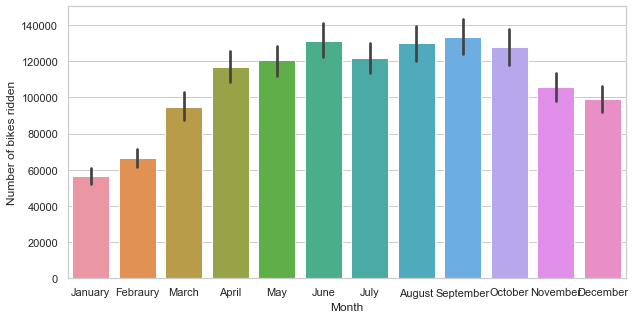

In [10]:
# Plotting Monthly count of bikes for the year 2012
plt.figure(figsize=(10, 5))
sns.barplot(x = train_df.loc[train_df.year == "2012", "month"], y=train_df["count"], estimator=sum)
plt.ylabel("Number of bikes ridden")
plt.xlabel("Month")
plt.show()

September is the month where the most bikes rides are taken for the year 2012.

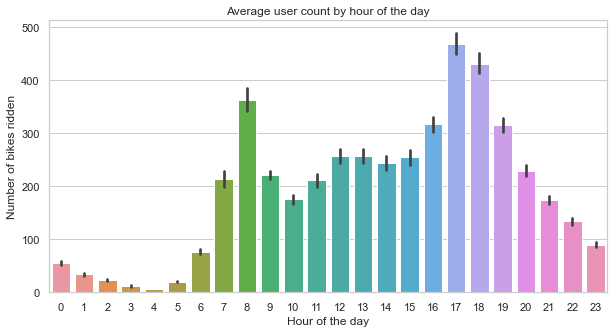

In [12]:
#Average User Count by hour of the day 
plt.figure(figsize=(10, 5))
sns.barplot(x = train_df["hour"], y=train_df["count"])
plt.ylabel("Number of bikes ridden")
plt.xlabel("Hour of the day")
plt.title("Average user count by hour of the day")
plt.show()

We see that in a day the maximum bike rides are taken at 5 PM.
5 PM is usually when work ends. This shows that people choose to bike back from work as compared to biking to work.

Business Action: Make sure there is availability of bikes near common office spaces.

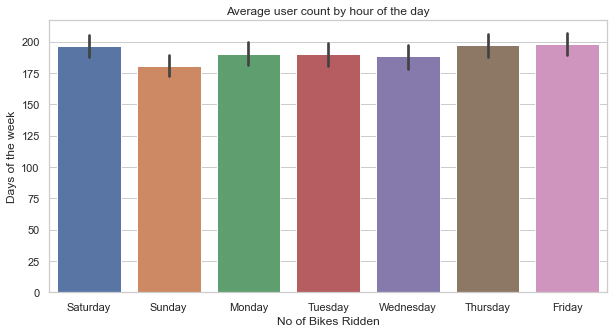

In [13]:
#Count of bikes rides over days of the week
plt.figure(figsize=(10, 5))
sns.barplot(x = train_df["day"], y=train_df["count"])
plt.ylabel("Days of the week")
plt.xlabel("No of Bikes Ridden")
plt.title("Average user count by hour of the day")
plt.show()

People prefer riding the bikes during working days since they are majorly using it for there commute to the workspace.

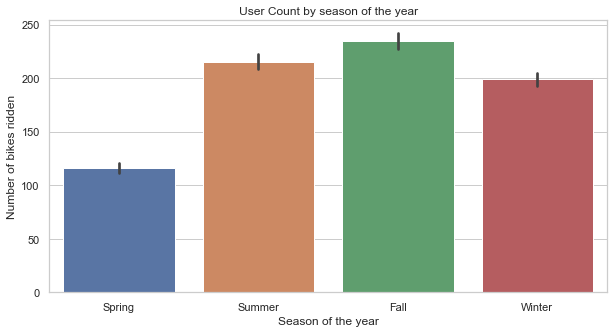

In [15]:
# Count of bikes by season of the year 
plt.figure(figsize=(10, 5))
sns.barplot(x = train_df["season"], y=train_df["count"])
plt.ylabel("Number of bikes ridden")
plt.xlabel("Season of the year")
plt.title("User Count by season of the year")
plt.show()

People prefer riding the bikes in summer and fall.

<AxesSubplot:xlabel='registered'>

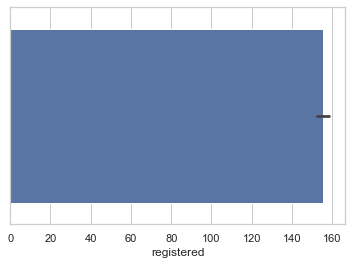

In [41]:
#Countplot of users who have registered for the service
sns.barplot(x=train_df["registered"])


Most users using the service are registered users.

<AxesSubplot:xlabel='casual'>

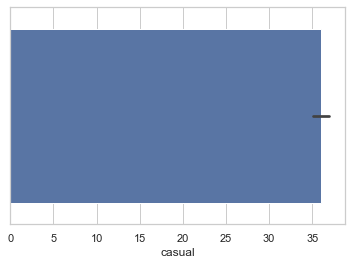

In [42]:
#Countplot of users who have not registered for the service
sns.barplot(x=train_df["casual"])


The no of casual or first time users using the service are comparatively low

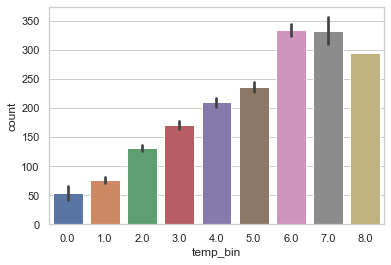

In [25]:
#Creating bins for different temperatures of the day
#The bins 6,7 have the highest ride share demand which corresponds to temperature range between 30-35
#Bin 1 :0-5, Bin 2: 5-10 , Bin 3:10-15, Bin 4:15-20, Bin 5:20-25 , Bin 6:25-30 , Bin 7:30-35
train_df["temp_bin"] = np.floor(train_df["temp"]) // 5
train_df["temp_bin"].map({0:"0-5",1:"5-10",2:"10-15",3:"15-20",4:"20-25",5:"25-30",6:"30-35",7:"35-40",8:"40-50"})
train_df.head()
# now we can visualize as follows
sns.barplot(x=train_df["temp_bin"], y=train_df["count"], data=train_df,)
plt.show()

It can been seen that the temperature ranges of 30-35,40-45 have the highest no of bikes rides.

In [27]:
X = train_df.drop("count", axis=1)
y = train_df["count"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
nomimal_variables = ["season", "weather"]
nominal_encoder = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nom_encode", nominal_encoder, nomimal_variables),
    ]
)
mse_log = []
r2_score_log = []
model_list = [
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    SVR(),
]
for model in model_list:
    clf = Pipeline(
        steps=[
            ("prep", preprocessor),
            ("model", model),
        ]
    )
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2_score_cal = r2_score(y_test,y_pred)
    r2_score_log.append([str(model), r2_score])
    mse = mean_squared_error(y_pred, y_test)
    mse_log.append([str(model), mse])


In [29]:
#Convert a list to dataframe
mse_log
mse_df = pd.DataFrame(mse_log)
print(mse_df)

                         0             1
0  RandomForestRegressor()  29916.146574
1      AdaBoostRegressor()  30828.732924
2       BaggingRegressor()  29925.164852
3                    SVR()  31759.570994


In [30]:
r2_df = pd.DataFrame(r2_score_log)
print(r2_df)

                         0                                      1
0  RandomForestRegressor()  <function r2_score at 0x7f8da85b2700>
1      AdaBoostRegressor()  <function r2_score at 0x7f8da85b2700>
2       BaggingRegressor()  <function r2_score at 0x7f8da85b2700>
3                    SVR()  <function r2_score at 0x7f8da85b2700>


Comparing the mse values for the different models
It can be seen that the Random Forest Model performs the best since it has the lowest mean squared error